In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from scipy.special import boxcox1p
import seaborn as sns

In [2]:
df = pd.read_csv("Data2.csv")

In [3]:
df.head()

,Date,Model,Count
0,08/31/16,M45,5
1,08/31/16,M121,3
2,08/31/16,M122,4
3,08/31/16,M91,10
4,08/31/16,M66,57


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46116 entries, 0 to 46115
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    46116 non-null  object
 1   Model   46116 non-null  object
 2   Count   46116 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe()

,Count
count,46116.000000
mean,96.690108
std,315.065946
min,1.000000
25%,3.000000
50%,14.000000
75%,67.000000
max,6678.000000


In [6]:
df['Model'].value_counts()

M119    926
M70     778
M97     770
M88     769
M43     748
       ... 
M14      13
M84      10
M42       2
M12       1
M47       1
Name: Model, Length: 124, dtype: int64

In [7]:
df['Date'].value_counts()

08/08/16    99
08/14/16    95
08/19/16    94
08/04/16    94
08/17/16    94
            ..
01/04/14     2
01/07/14     2
01/19/14     2
01/12/14     1
01/03/14     1
Name: Date, Length: 971, dtype: int64

In [8]:
df['Count'].value_counts()

1       6141
2       3697
3       2566
4       1913
5       1475
        ... 
1295       1
1071       1
847        1
751        1
3374       1
Name: Count, Length: 1191, dtype: int64

# Missing values

In [9]:
df.isnull().sum()

Date     0
Model    0
Count    0
dtype: int64

In [10]:
# check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Date', 'Model']

In [11]:
df['Date'] = pd.to_datetime(df['Date'], errors= 'coerce')

In [12]:
df['Date'] = df['Date'].dt.strftime("%m%d%y").astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46116 entries, 0 to 46115
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    46116 non-null  int32 
 1   Model   46116 non-null  object
 2   Count   46116 non-null  int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 900.8+ KB


In [14]:
df.head()

,Date,Model,Count
0,83116,M45,5
1,83116,M121,3
2,83116,M122,4
3,83116,M91,10
4,83116,M66,57


In [15]:
df.describe(include='all')

,Date,Model,Count
count,46116.000000,46116,46116.000000
unique,NaN,124,NaN
top,NaN,M119,NaN
freq,NaN,926,NaN
mean,64321.339210,NaN,96.690108
std,32222.909983,NaN,315.065946
min,10114.000000,NaN,1.000000
25%,40416.000000,NaN,3.000000
50%,62516.000000,NaN,14.000000
75%,90114.000000,NaN,67.000000


In [16]:
df['Model'].unique()

array(['M45', 'M121', 'M122', 'M91', 'M66', 'M100', 'M5', 'M14', 'M62',
       'M15', 'M61', 'M82', 'M108', 'M55', 'M43', 'M31', 'M90', 'M96',
       'M69', 'M76', 'M56', 'M92', 'M72', 'M94', 'M8', 'M97', 'M71',
       'M57', 'M107', 'M99', 'M18', 'M30', 'M36', 'M86', 'M13', 'M73',
       'M81', 'M41', 'M79', 'M70', 'M110', 'M95', 'M51', 'M117', 'M22',
       'M10', 'M65', 'M115', 'M75', 'M124', 'M2', 'M42', 'M112', 'M27',
       'M53', 'M60', 'M120', 'M23', 'M4', 'M39', 'M48', 'M32', 'M87',
       'M6', 'M64', 'M68', 'M17', 'M7', 'M24', 'M44', 'M16', 'M77', 'M78',
       'M28', 'M12', 'M1', 'M84', 'M11', 'M25', 'M20', 'M105', 'M88',
       'M109', 'M21', 'M19', 'M40', 'M9', 'M116', 'M50', 'M67', 'M93',
       'M89', 'M63', 'M123', 'M119', 'M49', 'M52', 'M102', 'M85', 'M126',
       'M59', 'M38', 'M103', 'M74', 'M98', 'M37', 'M113', 'M125', 'M104',
       'M26', 'M35', 'M80', 'M127', 'M111', 'M118', 'M101', 'M58', 'M47',
       'M114', 'M54', 'M29', 'M34', 'M33', 'M106'], dtype=object)

# EDA

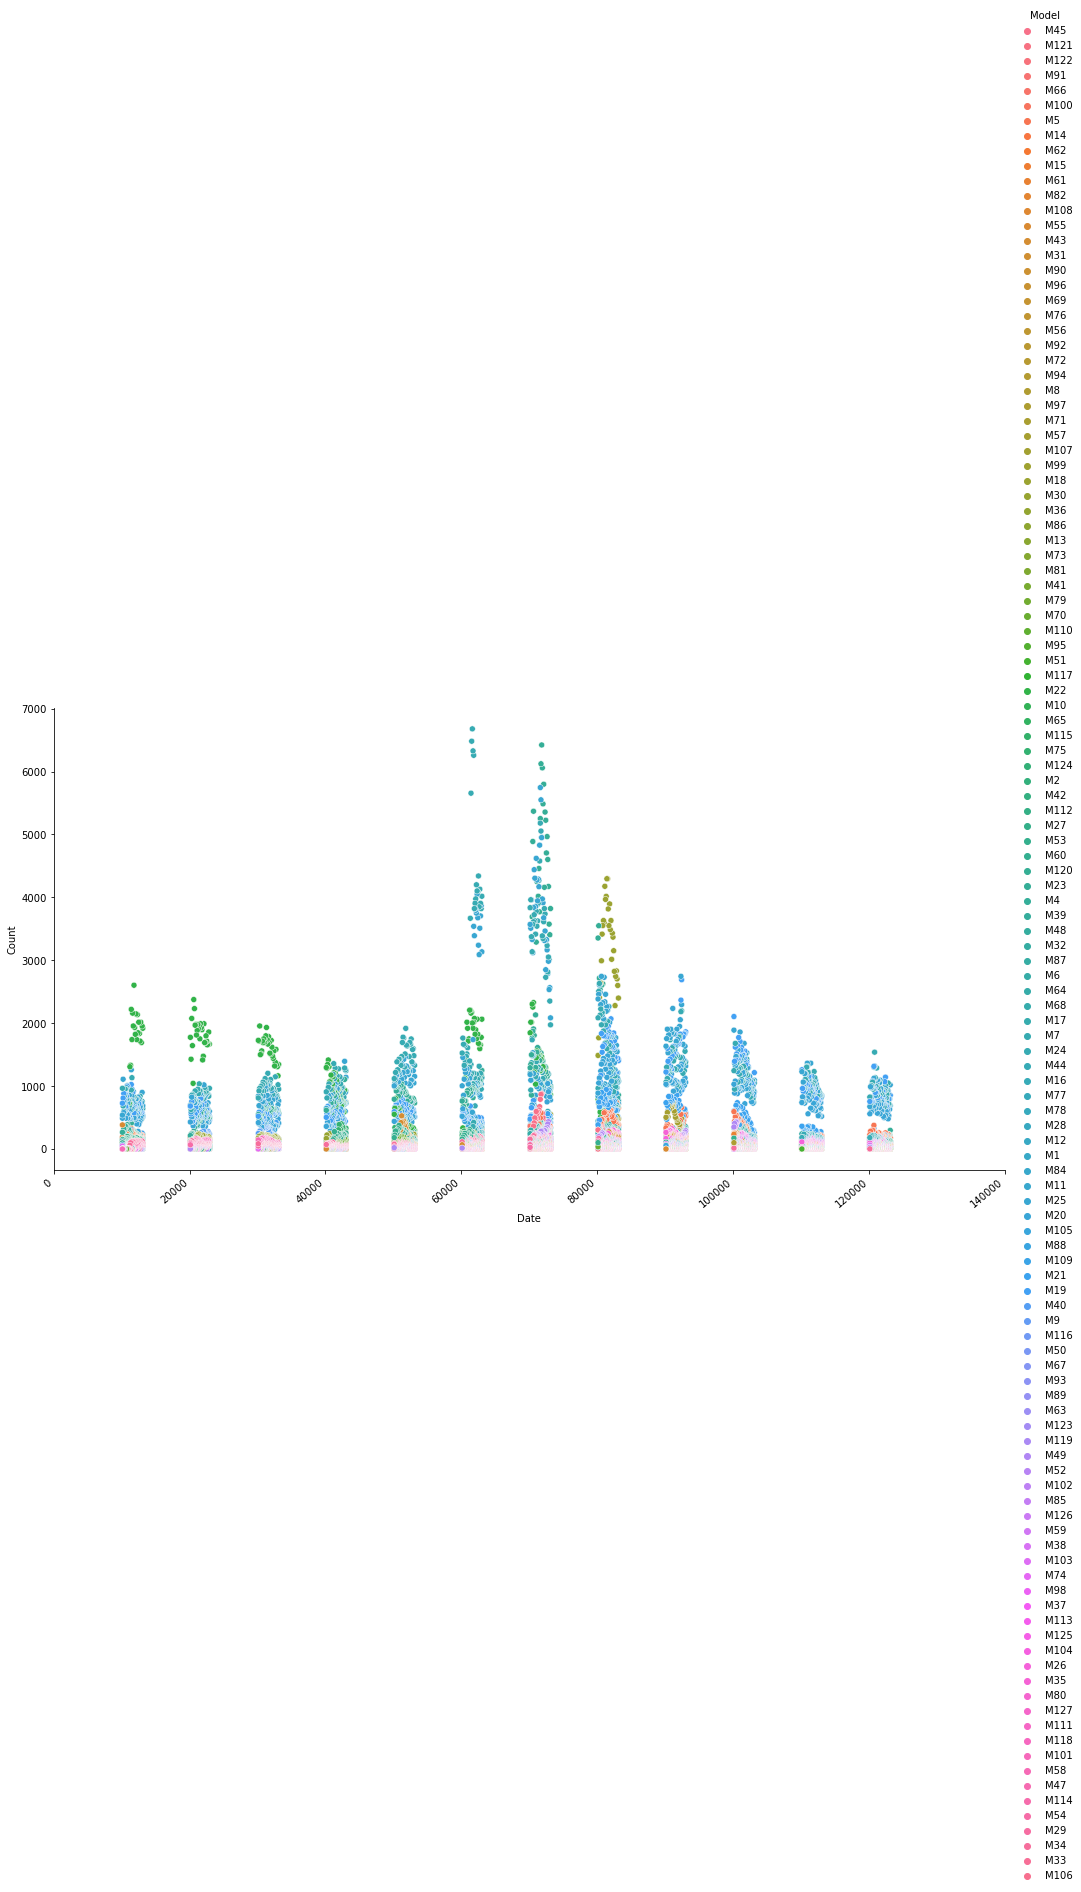

In [17]:
ax=sns.relplot(x='Date',y='Count',data=df,hue='Model',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

In [18]:
X=df[['Model','Date']]
y=df['Count']

In [19]:
X

,Model,Date
0,M45,83116
1,M121,83116
2,M122,83116
3,M91,83116
4,M66,83116
...,...,...
46111,M74,10114
46112,M59,10114
46113,M60,10114
46114,M54,10114


In [20]:
y.shape

(46116,)

# Train-Test Splitting

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [24]:
ohe=OneHotEncoder()
ohe.fit(X[['Model']])

OneHotEncoder()

In [25]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Model']),
                                    remainder='passthrough')

# Model Training - Linear Regression

In [26]:
lr=LinearRegression(normalize=True)

In [27]:
pipe=make_pipeline(column_trans,lr)

In [28]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['M1', 'M10', 'M100', 'M101', 'M102', 'M103', 'M104', 'M105',
       'M106', 'M107', 'M108', 'M109', 'M11', 'M110', 'M111', 'M112',
       'M113', 'M114', 'M115', 'M116', 'M117', 'M118', 'M119', 'M12',
       'M120', 'M121', 'M122', 'M123', 'M124', 'M125', 'M...
       'M56', 'M57', 'M58', 'M59', 'M6', 'M60', 'M61', 'M62', 'M63',
       'M64', 'M65', 'M66', 'M67', 'M68', 'M69', 'M7', 'M70', 'M71',
       'M72', 'M73', 'M74', 'M75', 'M76', 'M77', 'M78', 'M79', 'M8',
       'M80', 'M81', 'M82', 'M84', 'M85', 'M86', 'M87', 'M88', 'M89',
       'M9', 'M90', 'M91', 'M92', 'M93', 'M94', 'M95', 'M96', 'M97',
       'M98', 'M99'], dtype=object)]),
                                                  ['Model'])])),
                ('linearregression', Lin

In [29]:
y_pred=pipe.predict(X_test)

In [30]:
print("Accuracy: ",pipe.score(X_test, y_test) * 100)

Accuracy:  65.36052502947108


In [31]:
preds = pipe.predict(X_test)
preds[:15]

array([ 98.37362682, 111.30361714,  36.88501881,   2.66885732,
        69.62002456,  18.1213626 , 132.66051637,  16.35504713,
        35.88706955,  15.47656151,   9.76346887,  57.16748077,
         7.77290542,  28.54844394,  52.09647143])

In [32]:
np.array(y_test)[:15]

array([ 14,   2,   6,  14, 172,  27,  51,   1,   8,   7,   2,   5,  35,
         8,  72], dtype=int64)

In [33]:
r2_score(y_test,y_pred)

0.6536052502947108

# Lasso Reggresion

In [34]:
lr=Ridge(normalize=True)

In [35]:
pipe=make_pipeline(column_trans,lr)

In [36]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['M1', 'M10', 'M100', 'M101', 'M102', 'M103', 'M104', 'M105',
       'M106', 'M107', 'M108', 'M109', 'M11', 'M110', 'M111', 'M112',
       'M113', 'M114', 'M115', 'M116', 'M117', 'M118', 'M119', 'M12',
       'M120', 'M121', 'M122', 'M123', 'M124', 'M125', 'M...
       'M48', 'M49', 'M5', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55',
       'M56', 'M57', 'M58', 'M59', 'M6', 'M60', 'M61', 'M62', 'M63',
       'M64', 'M65', 'M66', 'M67', 'M68', 'M69', 'M7', 'M70', 'M71',
       'M72', 'M73', 'M74', 'M75', 'M76', 'M77', 'M78', 'M79', 'M8',
       'M80', 'M81', 'M82', 'M84', 'M85', 'M86', 'M87', 'M88', 'M89',
       'M9', 'M90', 'M91', 'M92', 'M93', 'M94', 'M95', 'M96', 'M97',
       'M98', 'M99'], dtype=object)]),
                                    

In [37]:
y_pred=pipe.predict(X_test)

In [38]:
print("Accuracy: ",pipe.score(X_test, y_test) * 100)

Accuracy:  49.578059156086084


In [39]:
preds = pipe.predict(X_test)
preds[:15]

array([ 98.64263559, 104.33989167,  67.56431374,  49.34771605,
        83.48594531,  57.92468245, 114.87303199,  56.77992367,
        67.08513781,  56.46914437,  53.67848225,  78.07857121,
        51.56438283,  62.77896286,  75.67816117])

In [40]:
np.array(y_test)[:15]

array([ 14,   2,   6,  14, 172,  27,  51,   1,   8,   7,   2,   5,  35,
         8,  72], dtype=int64)

In [41]:
r2_score(y_test,y_pred)

0.49578059156086085